# Workshop - Molecular Representation

## 1. How does a computer read and process molecular information?

![minipic](./img/ibuprofen_2d.png)

### While it's natural for us to conceptualise molecules as fundamentally being bonds and atoms, it can be difficult for a computer to process.

$~$

### Alternative ways we can represent molecules can be as IUPAC names, structural formulas, etc

### For the molecule above:

- #### **2-(4-isobutylphenyl)propanoic acid**
- #### **C13H18O2**
- #### **CC(Cc1ccc(cc1)C(C(=O)O)C)C**

### The standard computation input for molecules are typically SMILES string, **S**implified **M**olecular-**I**nput **L**ine-**E**ntry **S**ystem   [More Info](https://www.daylight.com/dayhtml/doc/theory/theory.smiles.html)

- #### **CC(Cc1ccc(cc1)C(C(=O)O)C)C**

### Systematic line notation to represent chemical structure using characters, alternate representation of the ball and stick diagram above

$~$

### **Pros**:
- #### Quick
- #### Easy to store
- #### Relatively robust

### **Cons**:
- #### 2D notation
- #### Not unique
- #### Sparse, many SMILES strings don't correspond to real molecules

$~$

### Computers inputs are all based on a **numeric** system, with data being stored in ***bits*** of data, and a single ***byte*** of data contains 8 bits

### With that system in mind you can make 256 different combinations in 1 byte of data.

$~$

### For instance:
- #### A : 01000001
- #### B : 01000010
- #### C : 01000011

- #### a : 01100001
- #### b : 01100010
- #### c : 01100011

### the same process applies for symbols!

- #### = : 00111011
- #### [ : 01011011
- #### ] : 01011101

### In that respect, although it is an alphabetical input, SMILES string are inherently processed as numeric inputa by reading the binary bitstring

### With the right python packages, such as rdkit, it becomes possible to recreate a ***molecular graph*** from the SMILES string!

In [25]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True

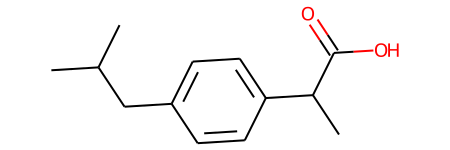

In [26]:
ibuprofen = Chem.MolFromSmiles('CC(Cc1ccc(cc1)C(C(=O)O)C)C')
ibuprofen

#### This is possible as RDKit is a coding package written to process chemical information, it contains inherent rules to help with processing bond information such as hybridisation

#### Alternatives to SMILES strings could include SELFIES, SMARTS, fingerprints.

#### Fingerprints are particularly useful since the length of input data is predetermined meaning the molecules can easily be directly compared

In [27]:
ibuprofen_fps = AllChem.GetMorganFingerprintAsBitVect(ibuprofen, 2)
print(f"Ibuprofen fingerprint: {ibuprofen_fps.ToBitString()}")

Ibuprofen fingerprint: 01000000000000000000000000000000000000000000000000000000000000000000000000000001100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000100100000000000000000000000000000000000000000010000000000000000000010000000000000000000000000000000001000000000000000000000

#### So far all of the aforementioned methods only encode 2D information, so what if you want a 3D input . . .

# 2. 3D Input

![minipic](./img/ibuprofen_3d.png)

### Molecules are 3D in nature existing in different conformations, how would you represent this numerically?

### A simple entry is as positions of atoms in 3D space using **x, y, z** co-ordinates

In [28]:
ibuprofen_3D = Chem.AddHs(ibuprofen)
AllChem.EmbedMolecule(ibuprofen_3D)

0

In [29]:
import numpy as np

xyz_arr = []
for idx, atom in enumerate(ibuprofen_3D.GetAtoms()):
    coords = []
    pos = ibuprofen_3D.GetConformer().GetAtomPosition(idx)
    coords.append(pos.x)
    coords.append(pos.y)
    coords.append(pos.z)
    xyz_arr.append(coords)

np.array(xyz_arr)

array([[-4.55190963, -0.46835735,  0.62511894],
       [-3.11870142, -0.60220725,  0.15275586],
       [-2.22813418, -0.00782547,  1.21523019],
       [-0.79008972, -0.08906827,  0.84743956],
       [-0.16879992,  0.92708471,  0.14199899],
       [ 1.15969775,  0.87972135, -0.21221754],
       [ 1.93355156, -0.21182674,  0.13458083],
       [ 1.34523058, -1.22736417,  0.83030171],
       [ 0.01058983, -1.17021574,  1.18118071],
       [ 3.37715967, -0.30130957, -0.23057352],
       [ 4.1561771 ,  0.84294077,  0.30641957],
       [ 5.12348059,  0.65422491,  1.11149983],
       [ 3.87915411,  2.15218077, -0.03199799],
       [ 3.42244678, -0.33129903, -1.75705268],
       [-3.00606825,  0.23830197, -1.12251064],
       [-4.68142916, -1.07740026,  1.53664221],
       [-4.82562001,  0.59661561,  0.76036997],
       [-5.23825012, -0.85493896, -0.17013592],
       [-2.89681863, -1.6460835 , -0.06716585],
       [-2.38038701, -0.55841966,  2.16331492],
       [-2.53659918,  1.04162182,  1.358

### This only represents spacial information, how would you encode additional physical data?

$~$

$~$

$~$

### One common method is with a coulomb matrix to account for atom type

$$ M_{ij} \begin{cases}
  0.5Z_i^{2.4} & \text{for }i\ = j\\    
  Z_iZ_j/R_{ij} & \text{for }i \neq j
\end{cases} $$
            

$ M $ represents the entry in the matrix position $i$ , $j$ \
$ i $ & $ j $ correspond to atom index / position \
$ Z $ is atomic number \
$ R $ is interatomic seperation

### It uses the molecules atomic number and distance between atom-pairs to generate values representing the repulsion between nuclei. It's a crude way of representing orbital overlaps but it's effective

In [82]:
from ase.io import read
from dscribe.descriptors import CoulombMatrix

atomic_numbers = [1, 6, 8]
rcut = 6.0
nmax = 8
lmax = 6

cm = CoulombMatrix(
    n_atoms_max=33,
)


mol = read("img/ibuprofen_3d.sdf")
ibuprofen_cm = cm.create(mol)
print(ibuprofen_cm)
ibuprofen_cm.shape


[73.51669472 28.38280494 38.02406419 ...  0.32459436  0.5466659
  0.5       ]


(1089,)

#### Why is the Coulomb Matrix of size 1089?

$ $

$ $

In [83]:
from ase.build import molecule

methanol = molecule('CH3OH')
methanol_cm = cm.create(methanol)
methanol_cm.shape

methanol

Atoms(symbols='COH4', pbc=False)

### While coulomb matrix are great there are some drawbacks, specifically in terms of data sparity

In [32]:
methanol_cm

array([73.51669472, 33.73297539,  8.24741496, ...,  0.        ,
        0.        ,  0.        ])

In [33]:
import numpy as np

print(f"Number of non-zero values, {np.count_nonzero(methanol_cm)}")

Number of non-zero values, 36


### But this can be alleviated with using a coulomb matrix eigenvalue instead!

### Alternatively you could also represent molecules as a graph, though this does require more complex neural networks to process graph data

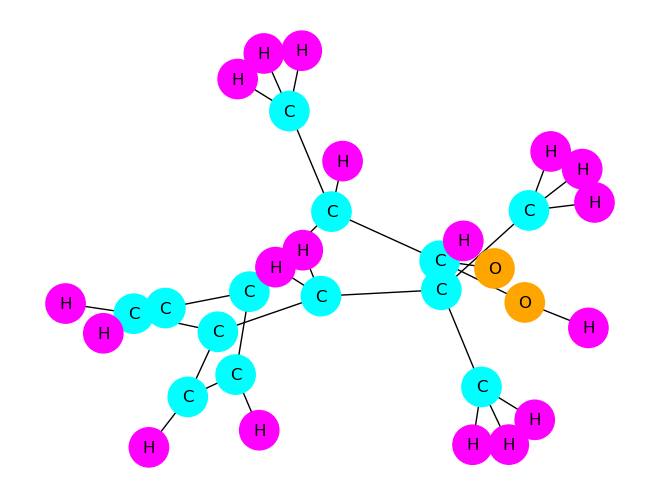

Ibuprofen nodes:
{0: 'C', 1: 'C', 2: 'C', 3: 'C', 4: 'C', 5: 'C', 6: 'C', 7: 'C', 8: 'C', 9: 'C', 10: 'C', 11: 'O', 12: 'O', 13: 'C', 14: 'C', 15: 'H', 16: 'H', 17: 'H', 18: 'H', 19: 'H', 20: 'H', 21: 'H', 22: 'H', 23: 'H', 24: 'H', 25: 'H', 26: 'H', 27: 'H', 28: 'H', 29: 'H', 30: 'H', 31: 'H', 32: 'H'}
Ibuprofen edges:
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [56]:
def mol_to_nx(mol):
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   is_aromatic=atom.GetIsAromatic(),
                   atom_symbol=atom.GetSymbol())
        
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())
        
    return G

import networkx as nx
import matplotlib.pyplot as plt

ibuprofen_nx = mol_to_nx(ibuprofen_3D)

ibuprofen_atom = nx.get_node_attributes(ibuprofen_nx, 'atom_symbol')

color_map = {'C': 'cyan',
             'O': 'orange',
             'H': 'magenta'}  

ibuprofen_colors = []
for idx in ibuprofen_nx.nodes():
    if (ibuprofen_nx.nodes[idx]['atom_symbol'] in color_map):
        ibuprofen_colors.append(color_map[ibuprofen_nx.nodes[idx]['atom_symbol']])
    else:
        ibuprofen_colors.append('gray')
    
nx.draw(ibuprofen_nx,
        labels=ibuprofen_atom,
        with_labels = True,
        node_color=ibuprofen_colors,
        node_size=800)

plt.show()

matrix = nx.to_numpy_matrix(ibuprofen_nx)

print('Ibuprofen nodes:')
print(ibuprofen_atom)

print('Ibuprofen edges:')
print(matrix)

## 3. Molecular similarity comparison

### Now that you have some understanding of how to represent a molecule, how would you compare one molecule to another?

### This concept is the easiest to follow with fingerprint similarity comparison

### The most widely used molecular fingerprinting method is the Morgan Fingerprint. All it does is iterate through each atom, generates fragments of the molecule centered around each atom at a given max radius, and assigns each fragement to a bit (not really!) on a bit string

In [87]:
radius = 6
nBits = 2048

In [88]:
bi_ibuprofen = {}
fp_ibuprofen = AllChem.GetMorganFingerprintAsBitVect(ibuprofen, radius=radius, nBits=nBits, bitInfo=bi_ibuprofen)
print(f'Total number of active feature: {len(bi_ibuprofen)}')
print(f'Features present: {list(fp_ibuprofen.GetOnBits())}')

Total number of active feature: 36
Features present: [1, 79, 80, 126, 248, 283, 310, 389, 516, 544, 650, 718, 807, 854, 857, 900, 921, 955, 978, 1025, 1035, 1057, 1146, 1257, 1365, 1380, 1568, 1700, 1750, 1754, 1776, 1844, 1847, 1853, 1873, 1917]


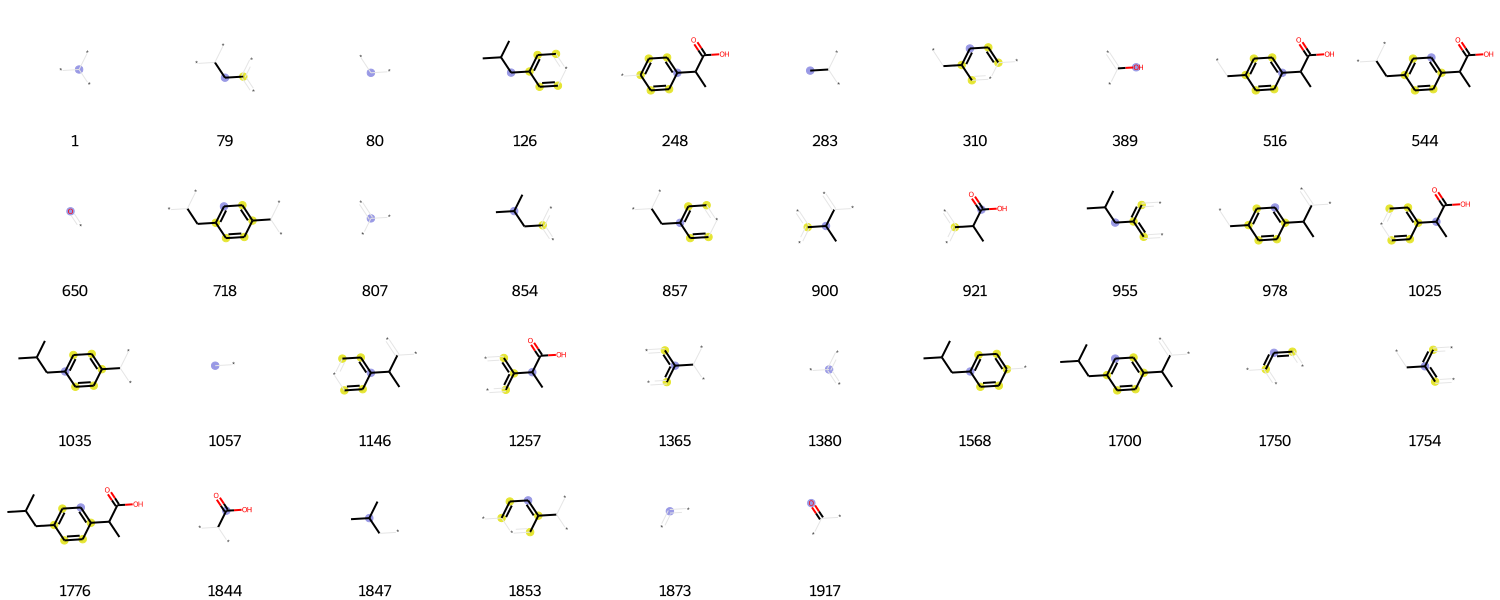

In [89]:
Draw.DrawMorganBits([(ibuprofen, x, bi_ibuprofen) for x in fp_ibuprofen.GetOnBits()], molsPerRow=10, legends=[str(x) for x in fp_ibuprofen.GetOnBits()])

In [90]:
print(f'Bit String: {fp_ibuprofen.ToBitString()}')

Bit String: 0100000000000000000000000000000000000000000000000000000000000000000000000000000110000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000100000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000010010000000000000000000000000000000000000000001000000000000000000001000000000000000000000000000000000100000000000000000000001000000000

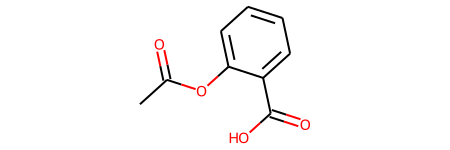

In [62]:
aspirin = Chem.MolFromSmiles('CC(=O)OC1=CC=CC=C1C(=O)O')
aspirin

Total number of active feature: 31
Bit String: 00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000100000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000

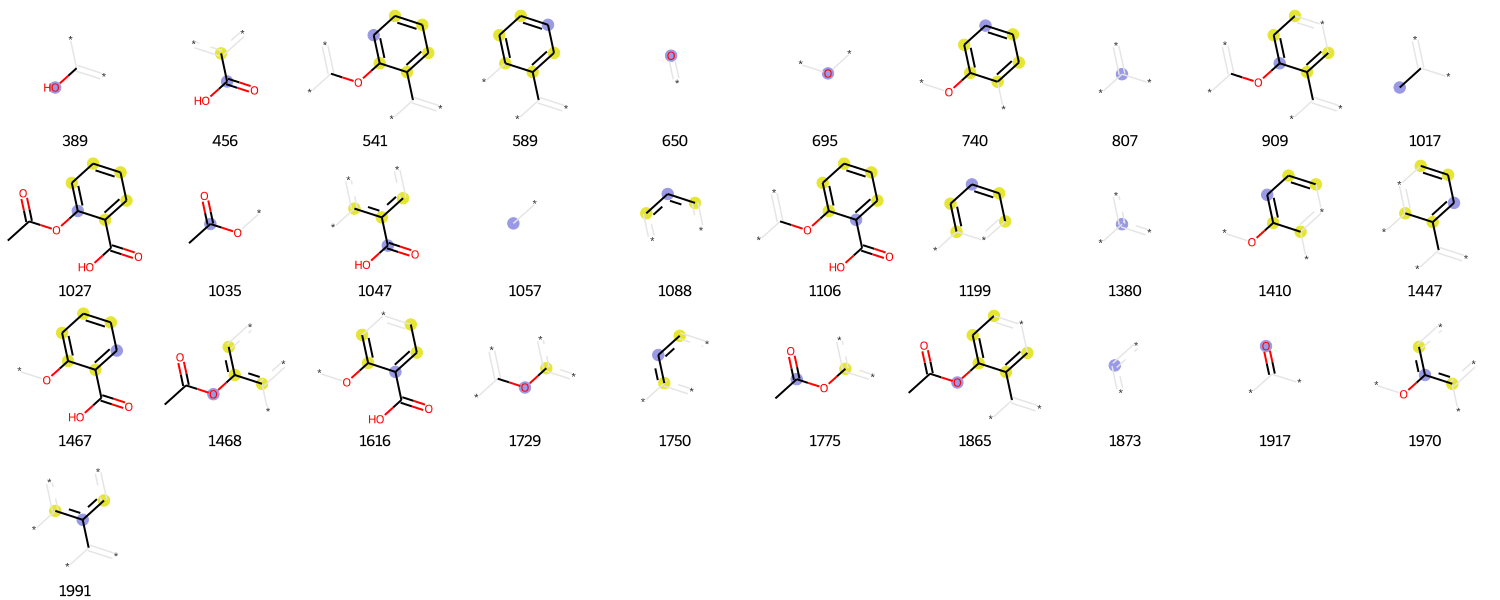

In [91]:
bi_aspirin = {}
fp_aspirin = AllChem.GetMorganFingerprintAsBitVect(aspirin, radius=radius, nBits=nBits, bitInfo=bi_aspirin)
# See what the fingerprint as a bit string looks like:
print(f'Total number of active feature: {len(bi_aspirin)}')
print(f'Bit String: {fp_aspirin.ToBitString()}\nFeatures present: {list(fp_aspirin.GetOnBits())}')
Draw.DrawMorganBits([(aspirin, x, bi_aspirin) for x in bi_aspirin], molsPerRow=10, legends=[str(x) for x in bi_aspirin])

9 common features:


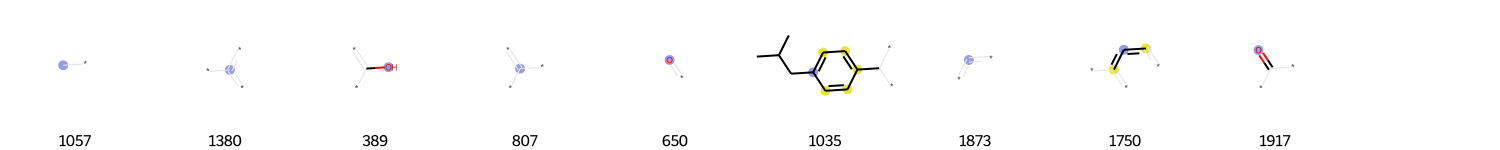

In [92]:
fp_intersection = set(fp_ibuprofen.GetOnBits()) & set(fp_aspirin.GetOnBits())
print(f'{len(fp_intersection)} common features:')
tpls = [(ibuprofen, x, bi_ibuprofen) for x in fp_intersection]
Draw.DrawMorganBits(tpls, molsPerRow=10, legends=[str(x) for x in fp_intersection])

### Since both molecules are relative similar to begin with in terms of fragment makeup the common features align, however due to how a fingerprint is generated and the 'folding' and 'hashing' procedure means that one bit in the bitstring can be assigned to multiple fragments

### This generally occurs when the total number of bits is set too low, below the aspirin fingerprint is set to a total of 128 bits

Total number of active feature: 29
Bit String: 00110100001101000000000100000100010000010000000100100001000110001100000111000100111000100000000000001000000000010000000001000100
Features present: [2, 3, 5, 10, 11, 13, 23, 29, 33, 39, 47, 50, 55, 59, 60, 64, 65, 71, 72, 73, 77, 80, 81, 82, 86, 100, 111, 121, 125]


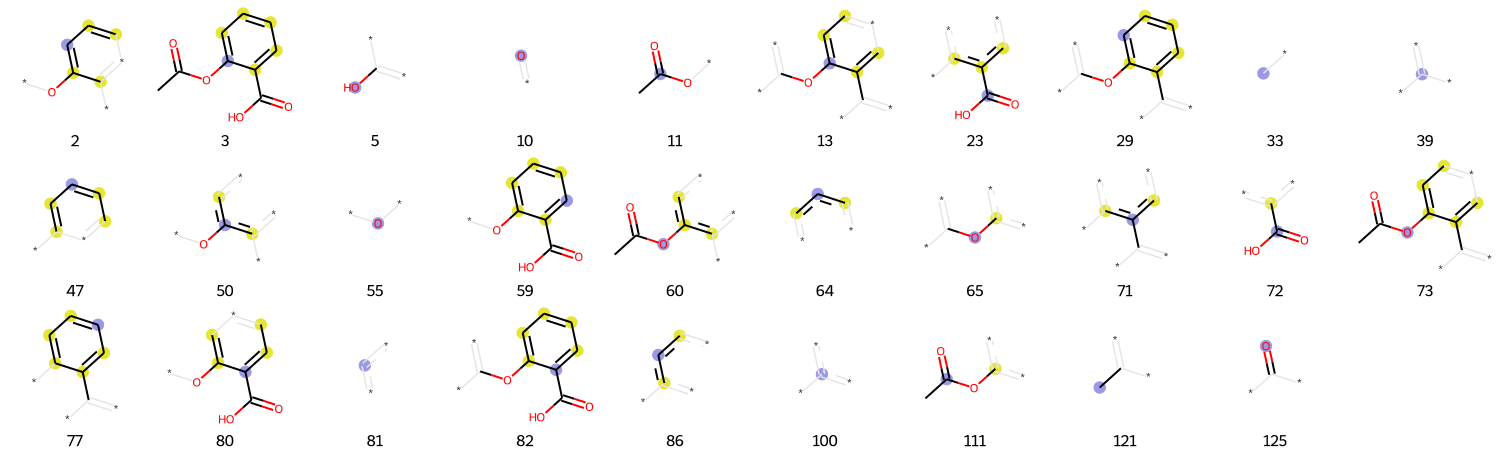

In [93]:
bi_aspirin_clash = {}
fp_aspirin_clash = AllChem.GetMorganFingerprintAsBitVect(aspirin, radius=radius, nBits=128, bitInfo=bi_aspirin_clash)
# See what the fingerprint as a bit string looks like:
print(f'Total number of active feature: {len(bi_aspirin_clash)}')
print(f'Bit String: {fp_aspirin_clash.ToBitString()}\nFeatures present: {list(fp_aspirin_clash.GetOnBits())}')
Draw.DrawMorganBits([(aspirin, x, bi_aspirin_clash) for x in bi_aspirin_clash], molsPerRow=10, legends=[str(x) for x in bi_aspirin_clash])

### The fundamental flaw of the bit collision will always be present and this can be alleviated by setting a high bitstring length, but this increases data sparsity. In general it's a balancing act and typically 2048 bit string is enough to discern most molecules at a radius of 3

### In theory due to the nature of fingerprint with the hashing and folding issue, the comparison is more effective in comparing the absence of a matched bit between fingerprints

### Back to the initial comparison between Ibuprofen and Aspirin

In [94]:
fp_union = set(fp_ibuprofen.GetOnBits()) | set(fp_aspirin.GetOnBits())
print(f'{len(fp_union)} total unique features')

58 total unique features


In [95]:
print(f"Number of common features between Ibuprofen and Aspirin divided by number of total unique features across both molecule's fingerprint: {8/54}")

Number of common features between Ibuprofen and Aspirin divided by number of total unique features across both molecule's fingerprint: 0.14814814814814814


In [78]:
rdkit.DataStructs.FingerprintSimilarity(fp_ibuprofen, fp_aspirin)

0.14814814814814814

In [85]:
imatinib = Chem.MolFromSmiles('CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)NC4=NC=CC(=N4)C5=CN=CC=C5')

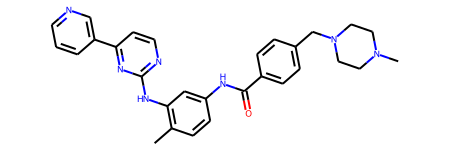

In [86]:
imatinib

Total number of active feature: 131
Bit String: 0000000000000010000000000000000000000000000000100000000010000000000000000010000010000001000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000110000010000000000000001000000000000000000000000000000000000000000001000010000000000001000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000001000000000000000000010000000000000000000000000000000000000010000000000000000000010000000000000000000001000001000010000000000000000000100000000000000000000000000100100000000000001000000000000000000000000001000000000010000000000000000000000100000000010000000000100001000000010000000100000000000000000000000000000000000000000000000000000000000000010000000100001100000000000000000000000000000000000000000000000100100000001000000000001000000000000000000000000000000000001010000000000000000001000000000010001000000000000010000000000000000000000000000000010000000010000000000000000

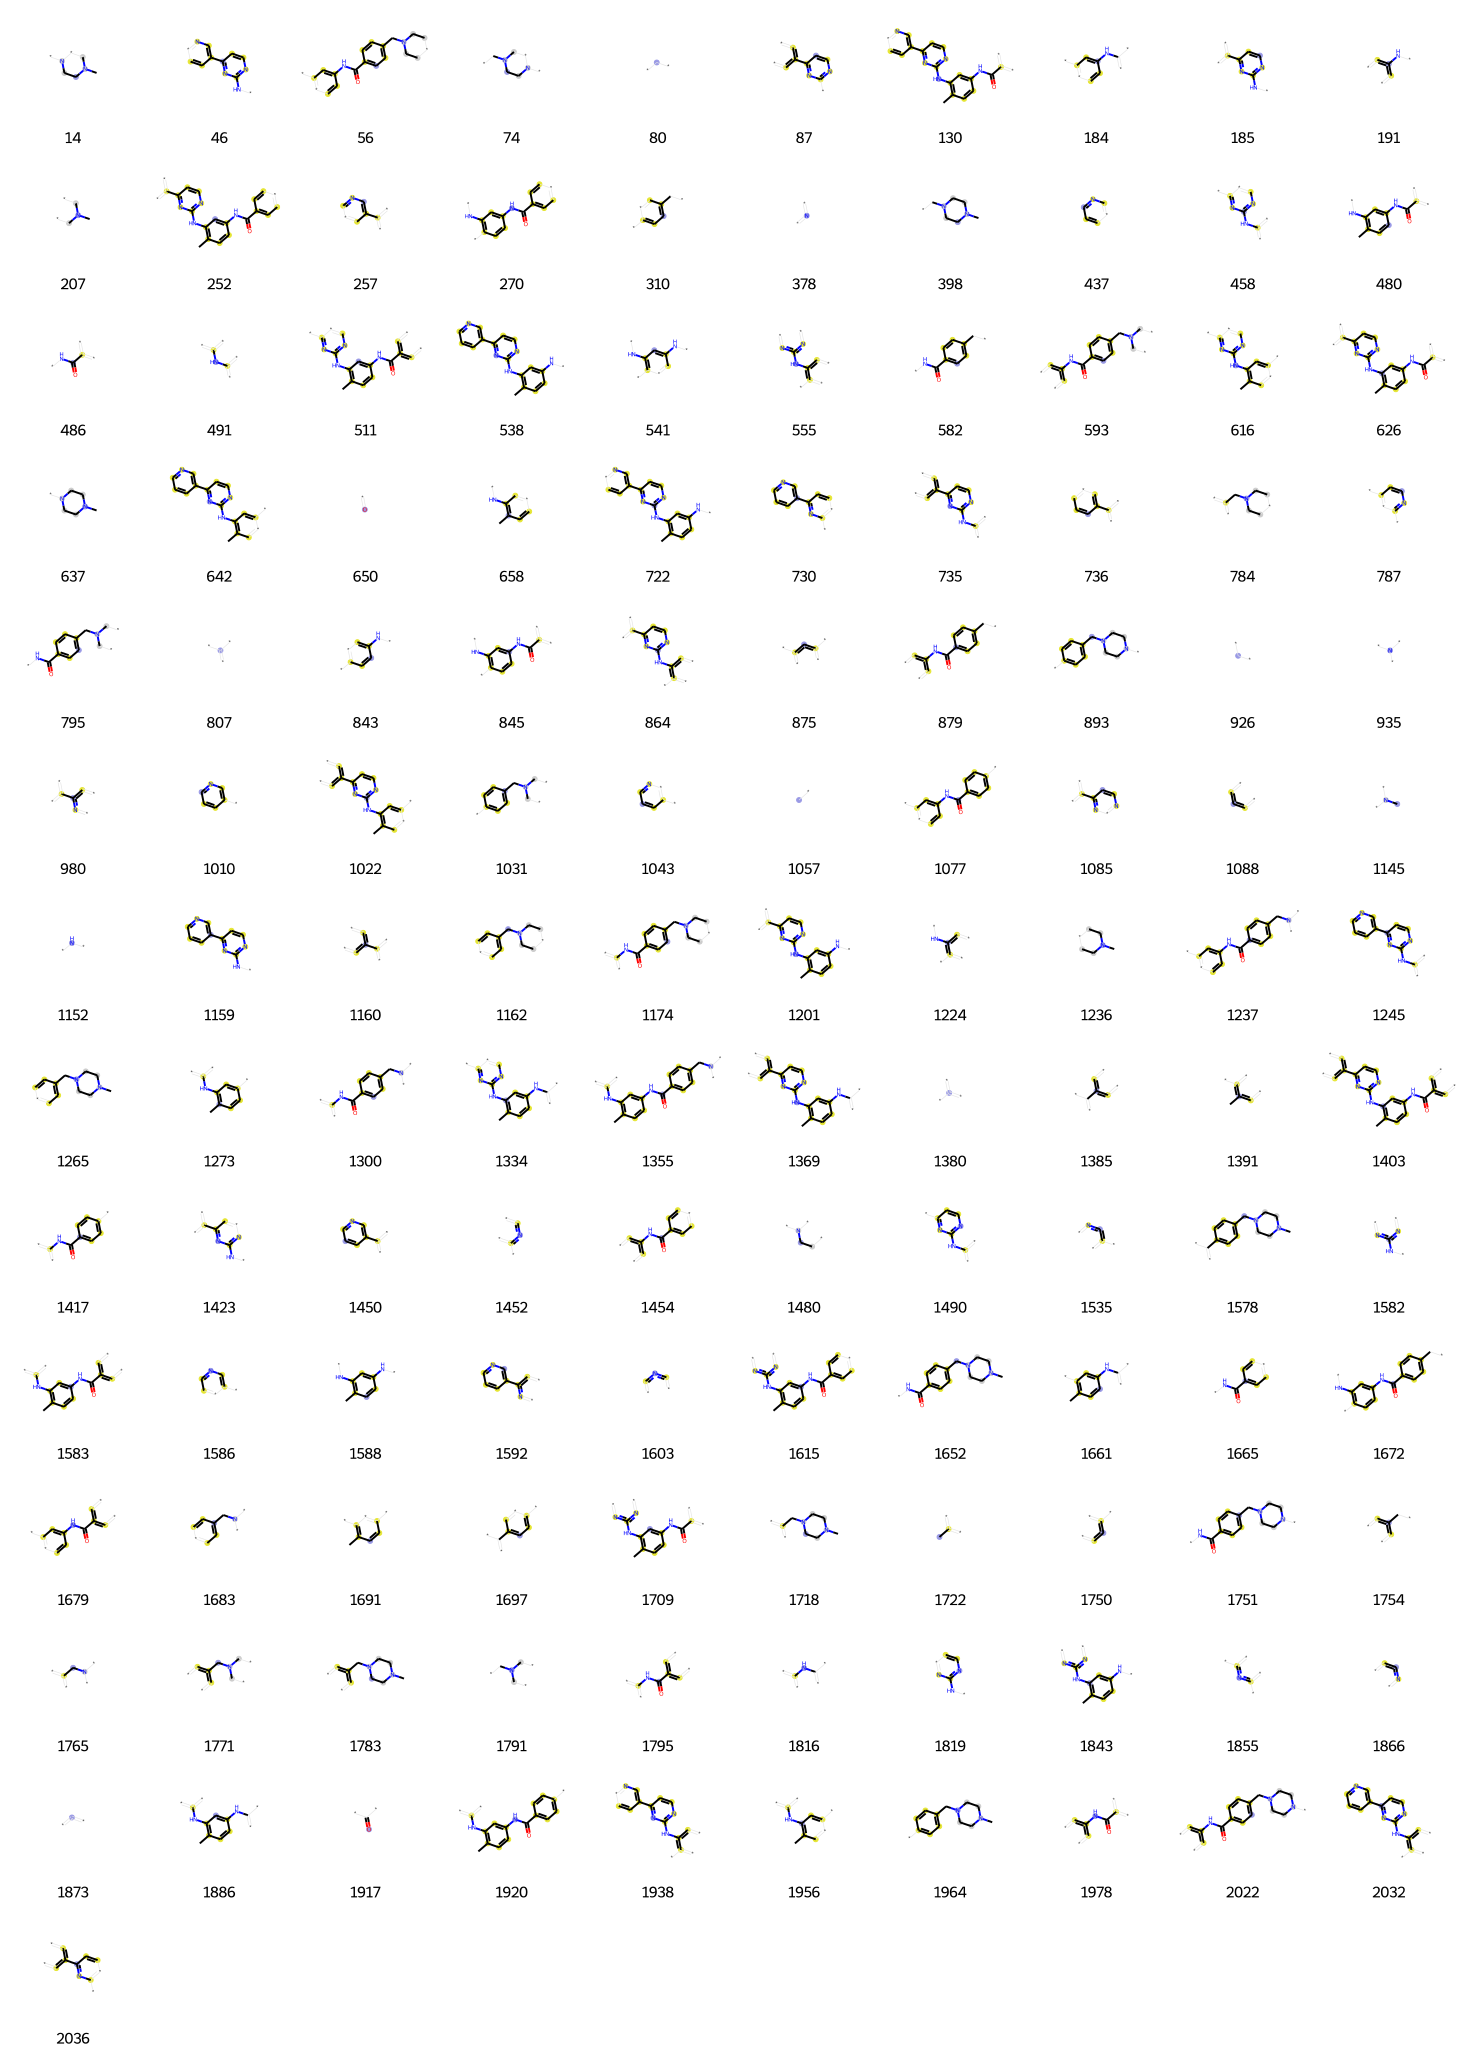

In [96]:
bi_imatinib = {}
fp_imatinib = AllChem.GetMorganFingerprintAsBitVect(imatinib, radius=radius, nBits=nBits, bitInfo=bi_imatinib)
print(f'Total number of active feature: {len(bi_imatinib)}')
print(f'Bit String: {fp_imatinib.ToBitString()}\nFeatures present: {list(fp_imatinib.GetOnBits())}')
Draw.DrawMorganBits([(imatinib, x, bi_imatinib) for x in bi_imatinib], molsPerRow=10, legends=[str(x) for x in bi_imatinib])

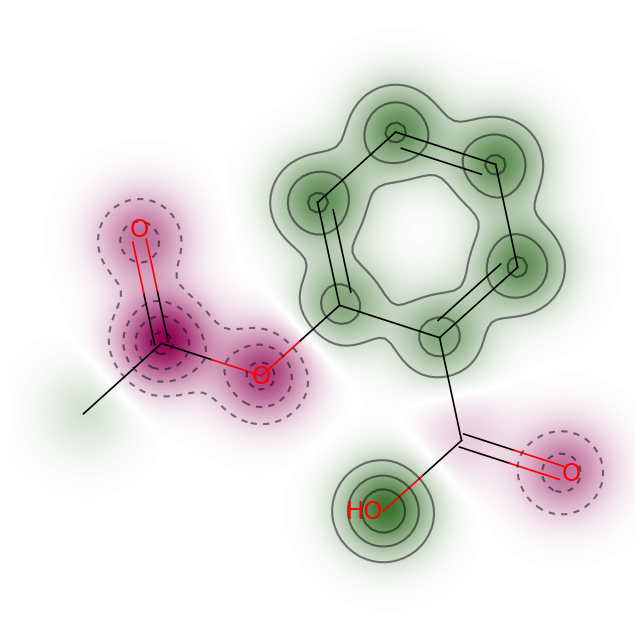

In [69]:
from rdkit.Chem.Draw import SimilarityMaps
from rdkit import DataStructs

fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(ibuprofen, aspirin, lambda m,idx: SimilarityMaps.GetMorganFingerprint(m, atomId=idx, radius=1, fpType='count'), metric=DataStructs.TanimotoSimilarity)

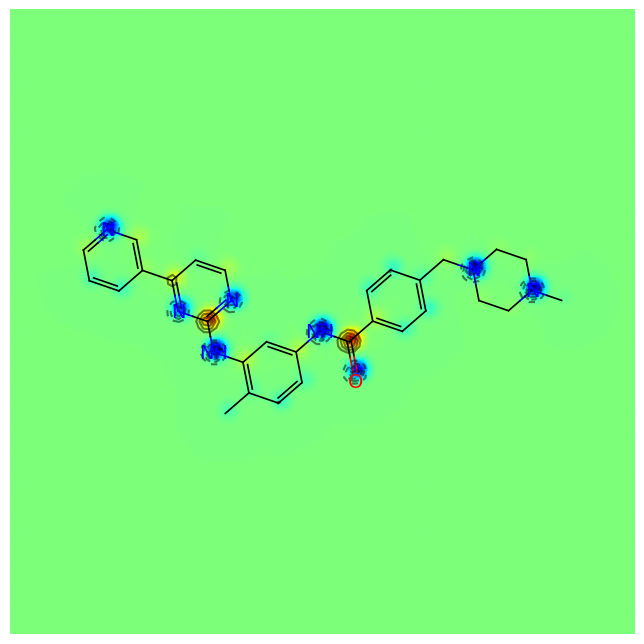

In [70]:
AllChem.ComputeGasteigerCharges(imatinib)
contribs = [imatinib.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(imatinib.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(imatinib, contribs, colorMap='jet', contourLines=10)